In [3]:
import numpy as np
from abstractLinModel import LinearModel
from typing import Union, Tuple
import pandas as pd
import matplotlib.pyplot as plt



In [16]:
class LogitRegression:
    def __init__(self, learning_rate: float, iterations: int, verbose: bool = False, l1: float = 0.0, l2: float = 0.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.verbose = verbose
        self.l1 = l1
        self.l2 = l2
        self.losses = []  # Новый список для хранения значений лосса

    def fit(self, X: np.ndarray, Y: np.ndarray) -> 'LogitRegression':
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
            loss_value = self.loss()
            self.losses.append(loss_value)  # Сохраняем текущий лосс
            if self.verbose and (i % 100 == 0 or i == self.iterations - 1):
                print(f"Iteration {i + 1}/{self.iterations} - Loss: {loss_value:.4f}")

        return self

    def update_weights(self) -> 'LogitRegression':
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
        tmp = (A - self.Y.T).reshape(self.m)
        
        dW = (np.dot(self.X.T, tmp) / self.m) + (self.l1 * np.sign(self.W) / self.m) + (self.l2 * self.W / self.m)
        db = np.sum(tmp) / self.m

        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self

    def loss(self) -> float:
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
        epsilon = 1e-15
        A = np.clip(A, epsilon, 1 - epsilon)
        log_loss = -np.mean(self.Y * np.log(A) + (1 - self.Y) * np.log(1 - A))

        l1_loss = self.l1 * np.sum(np.abs(self.W)) / self.m
        l2_loss = self.l2 * np.sum(np.square(self.W)) / (2 * self.m)
        return log_loss + l1_loss + l2_loss

    def predict(self, X: np.ndarray) -> np.ndarray:
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        return np.where(Z > 0.5, 1, 0)

    def train_test_split(self, x: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series], test_size: float = 0.2) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        test_count = int(len(x) * test_size)
        indices = np.random.permutation(len(x))
        test_indices = indices[:test_count]
        train_indices = indices[test_count:]
        X_train, X_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        return X_train, X_test, y_train, y_test


Iteration 1/10000 - Loss: 0.6922
Iteration 101/10000 - Loss: 0.6213
Iteration 201/10000 - Loss: 0.5801
Iteration 301/10000 - Loss: 0.5548
Iteration 401/10000 - Loss: 0.5385
Iteration 501/10000 - Loss: 0.5275
Iteration 601/10000 - Loss: 0.5199
Iteration 701/10000 - Loss: 0.5146
Iteration 801/10000 - Loss: 0.5107
Iteration 901/10000 - Loss: 0.5078
Iteration 1001/10000 - Loss: 0.5056
Iteration 1101/10000 - Loss: 0.5040
Iteration 1201/10000 - Loss: 0.5028
Iteration 1301/10000 - Loss: 0.5019
Iteration 1401/10000 - Loss: 0.5011
Iteration 1501/10000 - Loss: 0.5006
Iteration 1601/10000 - Loss: 0.5001
Iteration 1701/10000 - Loss: 0.4998
Iteration 1801/10000 - Loss: 0.4995
Iteration 1901/10000 - Loss: 0.4993
Iteration 2001/10000 - Loss: 0.4991
Iteration 2101/10000 - Loss: 0.4990
Iteration 2201/10000 - Loss: 0.4988
Iteration 2301/10000 - Loss: 0.4988
Iteration 2401/10000 - Loss: 0.4987
Iteration 2501/10000 - Loss: 0.4986
Iteration 2601/10000 - Loss: 0.4986
Iteration 2701/10000 - Loss: 0.4985
Iter

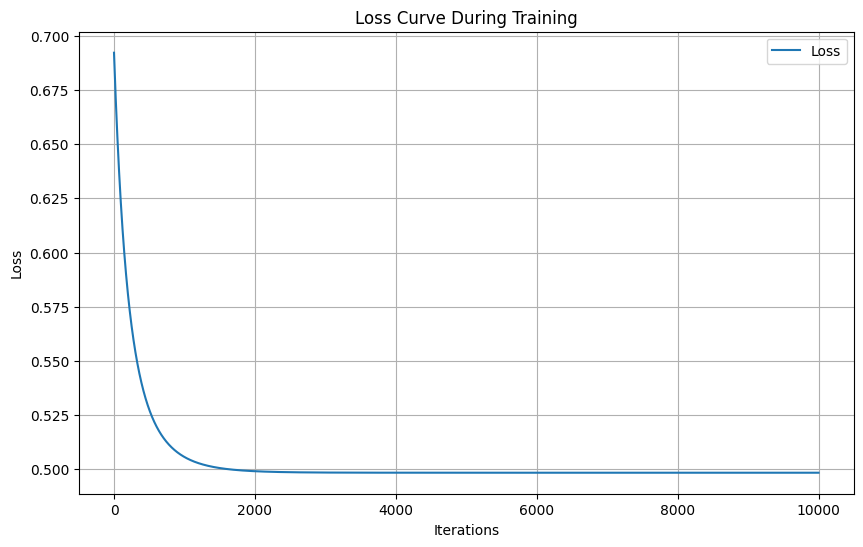

In [18]:
# Загрузка и обработка данных
data = pd.read_csv("diabetes.csv")
X = data[['Glucose', 'BMI']].values
y = data['Outcome'].values

# Нормализация данных
X = normalize_features(X)

# Обучение модели
model = LogitRegression(learning_rate=0.01, iterations=10000, verbose=True, l1=0.1, l2=0.1)
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

# Построение графика функции потерь
plt.figure(figsize=(10, 6))
plt.plot(model.losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.grid()
plt.show()
